

>
***Name*** : Dedwal Dipali 

***Designation*** : Data Science Intern

***Organization*** : OASIS INFOBYTE

Task 5 - SALES PREDICTION USING PYTHON

Problem Statement:
As a Data Scientist in a product / Service based company , Try to predict the future sales of the product considering the budget the company spent on different Advertisement Tools
Use Machine Learning Techniques for Sales Prediction using Python Programming



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as style
import warnings
warnings.filterwarnings('ignore')

In [4]:
advertising_data = pd.read_csv("Advertising.csv")

In [5]:
advertising_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
advertising_data.shape

(200, 5)

In [8]:
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
advertising_data.duplicated().sum()

0

In [10]:
advertising_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
advertising_data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [20]:
advertising_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Outlier analysis

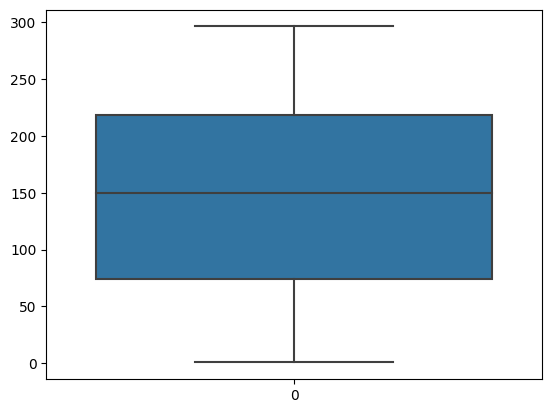

In [22]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(advertising_data['TV'],ax=axs)

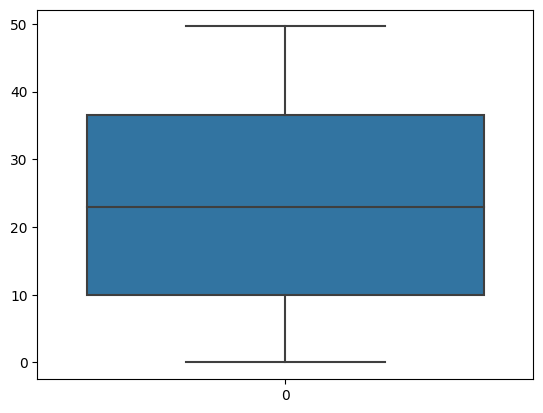

In [23]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(advertising_data['Radio'],ax=axs)

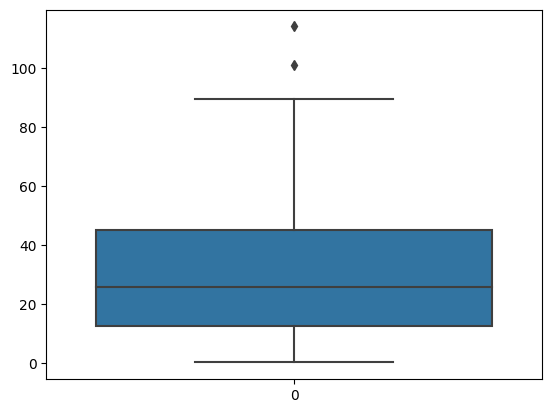

In [24]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(advertising_data['Newspaper'],ax=axs)

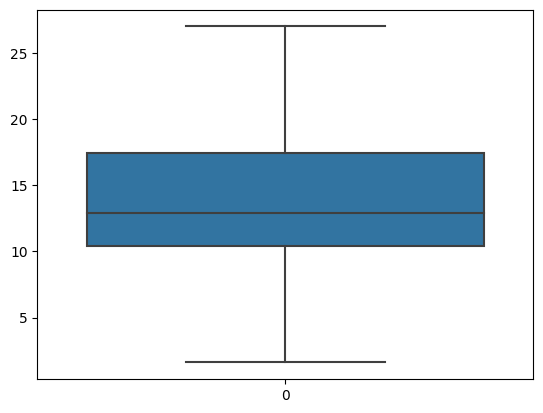

In [25]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(advertising_data['Sales'],ax=axs)

<Axes: xlabel='TV', ylabel='Sales'>

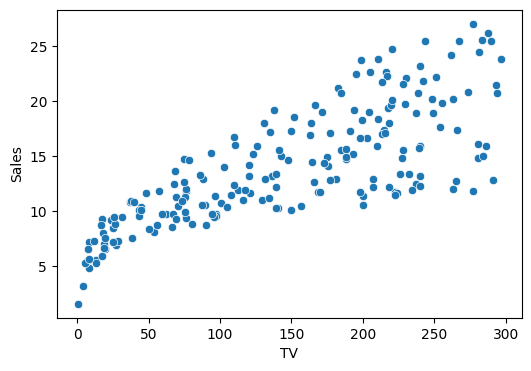

In [26]:
#Scatter plot is used find the distribution of effects of each advertising media against Target Sales variable 
plt.figure(figsize=(6,4))
sns.scatterplot(data=advertising_data,x=advertising_data['TV'],y=advertising_data['Sales'])


<Axes: xlabel='Radio', ylabel='Sales'>

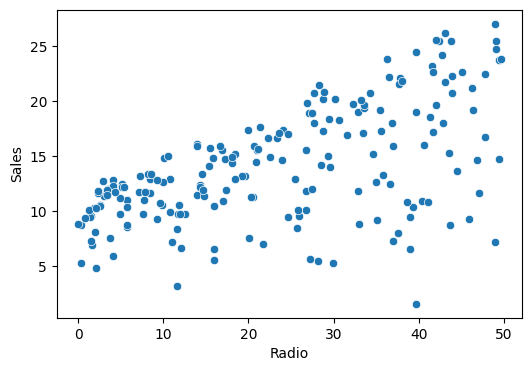

In [27]:
#Scatter plot is used find the distribution of effects of each advertising media against Target Sales variable 
plt.figure(figsize=(6,4))
sns.scatterplot(data=advertising_data,x=advertising_data['Radio'],y=advertising_data['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

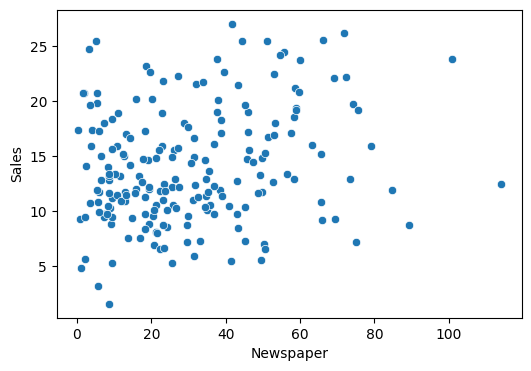

In [28]:
#Scatter plot is used find the distribution of effects of each advertising media against Target Sales variable 
plt.figure(figsize=(6,4))
sns.scatterplot(data=advertising_data,x=advertising_data['Newspaper'],y=advertising_data['Sales'])

* It is seen that TV data set is more linear as compared to other 2 variables .

#Heap

In [29]:
# find correlation between variables in data set for plotting heatmap
df_corr=advertising_data.corr()


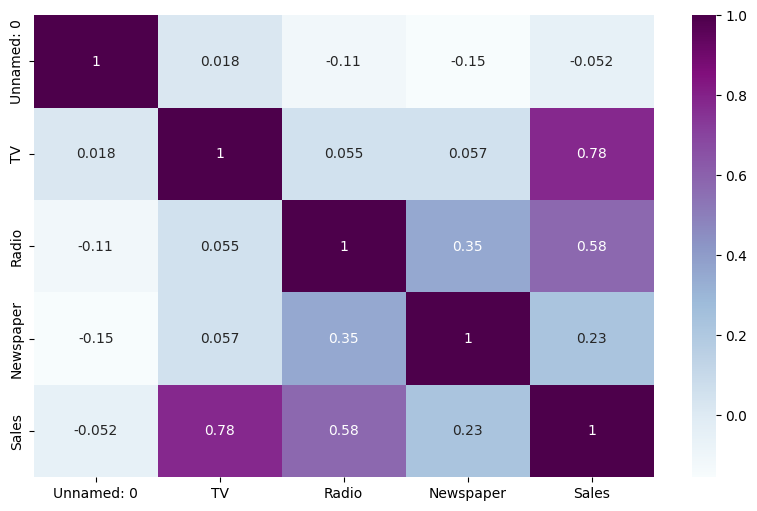

In [30]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

* We can see that TV variable has highest correlation value with the target Sales variable


Building Forecasting Model

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#First step in building the forecasting model is to identify the Feature(Input) variables and Target (Output) variable
features = advertising_data[['TV', 'Radio', 'Newspaper']]
target = advertising_data[['Sales']]

* Splitting data for training and testing the model

In [33]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

In [34]:
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (160, 3)
Test set of features:  (40, 3)
Target for train:  (160, 1)
Target for test:  (40, 1)


#Learn the model on train data

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Linear Regression Model ( a Supervised Machine learning Algorithm)
# LR models impose a linear function between predictor and response variables
my_model = LinearRegression()

In [37]:
# Fitting the model in train data set ie the Linear Regression Model learned from the on Train Data
my_model.fit(X_train, y_train)

LinearRegression()

Predicting the sales

In [38]:
# Predicting the sales from Feature Test values
y_pred = my_model.predict(X_test)
y_pred

array([[ 7.47394566],
       [ 5.90939108],
       [14.12777467],
       [11.89505474],
       [21.18635297],
       [ 4.25444212],
       [20.68099834],
       [ 6.95133607],
       [20.41211953],
       [ 6.62733131],
       [10.22590999],
       [ 4.26599504],
       [17.50149127],
       [ 9.62548682],
       [12.74722951],
       [10.35044145],
       [18.04518665],
       [11.01442985],
       [ 9.93155175],
       [ 8.7045633 ],
       [12.63765518],
       [ 8.66862676],
       [ 9.91655073],
       [14.61525266],
       [ 9.68557869],
       [22.91796143],
       [12.16301826],
       [ 8.06019362],
       [ 5.55592888],
       [20.47145736],
       [16.81580522],
       [18.05559816],
       [ 9.93159761],
       [17.09756424],
       [16.93904329],
       [15.38171078],
       [15.21391949],
       [23.56719516],
       [21.2578701 ],
       [16.2237537 ]])

Test the model

In [39]:
from sklearn.metrics import mean_squared_error

Mean Squared Error

In [40]:
# Compare the predicted values with the true values
mean_squared_error(y_pred, y_test)

2.9627784211287462

Coefficient of Determination or R Squared Value (r2)

In [41]:
from sklearn.metrics import r2_score

In [42]:
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,y_pred)

0.8954937231843466